In [1]:
# https://stackoverflow.com/questions/46390779/automatic-white-balancing-with-grayworld-assumption/46391574
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def white_balance_loops(img):
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    for x in range(result.shape[0]):
        for y in range(result.shape[1]):
            l, a, b = result[x, y, :]
            # fix for CV correction
            l *= 100 / 255.0
            result[x, y, 1] = a - ((avg_a - 128) * (l / 100.0) * 1.1)
            result[x, y, 2] = b - ((avg_b - 128) * (l / 100.0) * 1.1)
    result = cv.cvtColor(result, cv.COLOR_LAB2BGR)
    return result

In [32]:
img = cv.imread('grayworld_assumption_1.png')
# img = cv.imread('wb_sardmen-incorrect.jpg')
result = white_balance_loops(img)

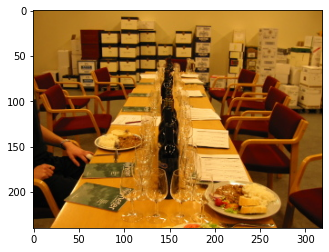

In [33]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

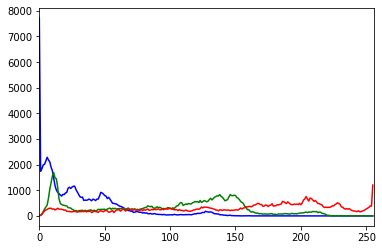

In [34]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

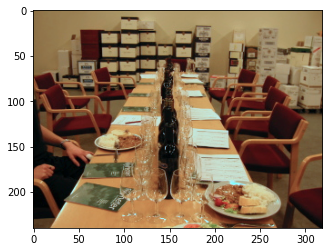

In [35]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

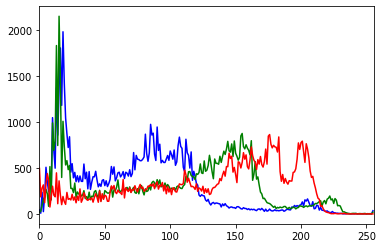

In [36]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([result],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

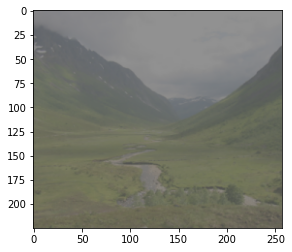

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('contrast_stretching.png')
# img = cv.imread('awb_1_2.jpg')
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

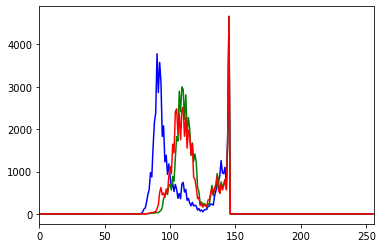

In [12]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
normalizedImg = np.zeros_like(img)
normalizedImg = cv.normalize(img,  normalizedImg, 0, 255, cv.NORM_MINMAX)

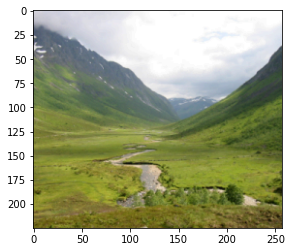

In [ ]:
plt.imshow(cv.cvtColor(normalizedImg, cv.COLOR_BGR2RGB))

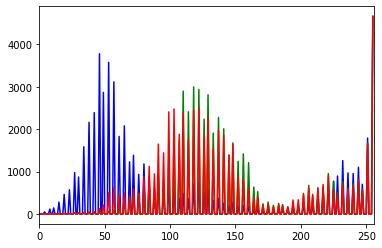

In [13]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([normalizedImg],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [22]:
import numpy as np

In [54]:
img = np.random.randint(100, high=105, size=(6, 6), dtype='uint8')

In [55]:
with np.printoptions(threshold=np.inf):
    print(img)

[[101 104 104 103 101 101]
 [103 100 102 103 102 102]
 [102 101 101 104 104 100]
 [102 102 104 100 101 104]
 [100 102 101 103 103 103]
 [101 101 102 101 100 103]]


### Question 8.3: Draw histogram chart in the blank paper!